In [1]:
import pandas as pd
import folium
import os
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
import zipfile
import os




In [ ]:
import pandas as pd
#for india file only
def load_and_preprocess_single_file(file_path):
    """
    Load a single CSV file and preprocess it.
    It ensures that the required columns ('latitude', 'longitude', 'yield') are present.
    """
    try:
        print(f"Loading: {file_path}")  # Print file being loaded
        df = pd.read_csv(file_path)

        # Rename columns to match expected names
        rename_map = {
            "latitude": "lat",
            "longitude": "lon",
        }
        df.rename(columns=rename_map, inplace=True)

        # Check if required columns are present
        if {'lat', 'lon', 'yield'}.issubset(df.columns):
            df["yield"] = pd.to_numeric(df["yield"], errors="coerce")
            df.dropna(subset=['lat', 'lon', 'yield'], inplace=True)  # Remove missing values
        else:
            raise ValueError(f"Missing required columns after renaming: {df.columns}")

    except Exception as e:
        raise ValueError(f"Error loading file: {str(e)}")

    return df

# File path to load
file_path = r"../blstm_100_future/updated_with_predictions.csv"

# Load the single CSV file and check the first few rows
df = load_and_preprocess_single_file(file_path)
print(f"Data shape: {df.shape}")  # Check the number of rows and columns
print(df.head())  # Check the first few rows of the loaded dataframe


Loading: ../blstm_100_future/updated_with_predictions.csv


ValueError: Error loading file: [Errno 2] No such file or directory: '../blstm_100_future/updated_with_predictions.csv'

In [ ]:
import pandas as pd
import os
#for historical data 

def load_and_preprocess_data(directory="."):
    """
    Load all CSV files from a directory and preprocess them.
    It will ensure that the required columns ('latitude', 'longitude', 'yield') are present.
    """
    dfs = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                try:
                    file_path = os.path.join(root, file)
                    print(f"Loading: {file_path}")  # Print file being loaded
                    df = pd.read_csv(file_path)

                    # Rename columns to match expected names
                    rename_map = {
                        "latitude": "lat",
                        "longitude": "lon",
                    }
                    df.rename(columns=rename_map, inplace=True)

                    # Check if required columns are present
                    if {'lat', 'lon', 'yield'}.issubset(df.columns):
                        df["Country"] = file.replace("maize_", "").replace(".csv", "").replace("_", " ")
                        df["yield"] = pd.to_numeric(df["yield"], errors="coerce")
                        df.dropna(subset=['lat', 'lon', 'yield'], inplace=True)  # Remove missing values
                        dfs.append(df)
                    else:
                        print(f"Skipping {file} - Missing required columns after renaming: {df.columns}")

                except Exception as e:
                    print(f"Error loading {file}: {str(e)}")

    if not dfs:
        raise ValueError("No CSV files were loaded successfully")

    return pd.concat(dfs, ignore_index=True)

# Load the data and check the first few rows
df = load_and_preprocess_data(r"C:\Users\sahil\Desktop\Crop_yeild\maize_country_data")
print(f"Data shape: {df.shape}")  # Check the number of rows and columns
print(df.head())  # Check the first few rows of the loaded dataframe


Loading: C:\Users\sahil\Desktop\Crop_yeild\maize_country_data\canva_countrywise_yield.csv
Skipping canva_countrywise_yield.csv - Missing required columns after renaming: Index(['Year', 'Argentina', 'Brazil', 'India', 'Mexico', 'South Africa',
       'Ukraine', 'United States'],
      dtype='object')
Loading: C:\Users\sahil\Desktop\Crop_yeild\maize_country_data\canva_statewise_Predicted_Yield.csv
Skipping canva_statewise_Predicted_Yield.csv - Missing required columns after renaming: Index(['Year', 'Andhra Pradesh', 'Assam', 'Manipur', 'Tamil Nadu', 'Telangana',
       'West Bengal'],
      dtype='object')
Loading: C:\Users\sahil\Desktop\Crop_yeild\maize_country_data\canva_statewise_yield.csv
Skipping canva_statewise_yield.csv - Missing required columns after renaming: Index(['Year', 'Andhra Pradesh', 'Assam', 'Manipur', 'Tamil Nadu', 'Telangana',
       'West Bengal'],
      dtype='object')
Loading: C:\Users\sahil\Desktop\Crop_yeild\maize_country_data\canva_yield_chart.csv
Skipping canv

In [ ]:
import pandas as pd
import os
#for future data

def load_and_preprocess_data(directory="."):
    """
    Load all CSV files from a directory and preprocess them.
    It will ensure that the required columns ('latitude', 'longitude', 'yield') are present.
    """
    dfs = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                try:
                    file_path = os.path.join(root, file)
                    print(f"Loading: {file_path}")  # Print file being loaded
                    df = pd.read_csv(file_path)

                    # Rename columns to match expected names
                    rename_map = {
                        "latitude": "lat",
                        "longitude": "lon",
                    }
                    df.rename(columns=rename_map, inplace=True)

                    # Check if required columns are present
                    if {'lat', 'lon', 'yield'}.issubset(df.columns):
                        df["Country"] = file.replace("maize_", "").replace(".csv", "").replace("_", " ")
                        df["yield"] = pd.to_numeric(df["yield"], errors="coerce")
                        df["Predicted_Yield"] = pd.to_numeric(df["Predicted_Yield"], errors="coerce")
                        df.dropna(subset=['lat', 'lon', 'yield'], inplace=True)  # Remove missing values
                        dfs.append(df)
                    else:
                        print(f"Skipping {file} - Missing required columns after renaming: {df.columns}")

                except Exception as e:
                    print(f"Error loading {file}: {str(e)}")

    if not dfs:
        raise ValueError("No CSV files were loaded successfully")

    return pd.concat(dfs, ignore_index=True)

# Load the data and check the first few rows
df = load_and_preprocess_data(r"C:\Users\sahil\Desktop\Crop_yeild\Future prediction\Predictions")
print(f"Data shape: {df.shape}")  # Check the number of rows and columns
print(df.head())  # Check the first few rows of the loaded dataframe


Loading: C:\Users\sahil\Desktop\Crop_yeild\Future prediction\Predictions\Argentina_predicted.csv
Loading: C:\Users\sahil\Desktop\Crop_yeild\Future prediction\Predictions\Brazil_predicted.csv
Loading: C:\Users\sahil\Desktop\Crop_yeild\Future prediction\Predictions\India_predicted.csv
Loading: C:\Users\sahil\Desktop\Crop_yeild\Future prediction\Predictions\Mexico_predicted.csv
Loading: C:\Users\sahil\Desktop\Crop_yeild\Future prediction\Predictions\South_Africa_predicted.csv
Loading: C:\Users\sahil\Desktop\Crop_yeild\Future prediction\Predictions\Ukraine_predicted.csv
Loading: C:\Users\sahil\Desktop\Crop_yeild\Future prediction\Predictions\United_States_predicted.csv
Data shape: (20695920, 17)
   year    lon    lat  Day   pr       rds       tas     tasmin    tasmax  \
0   420 -66.25 -33.75    0  0.0  232.4678  17.12024   9.029968  24.83603   
1   420 -66.25 -33.75    1  0.0  242.4891  20.92126  12.879790  32.63126   
2   420 -66.25 -33.75    2  0.0  233.2904  22.79663  11.131070  31.9768

In [3]:
# Assuming your DataFrame is named df
unique_locations = df[['lon', 'lat']].drop_duplicates().shape[0]

print("Total number of unique (lon, lat) locations:", unique_locations)

Total number of unique (lon, lat) locations: 3394


In [5]:
print(df.shape)

(30827760, 16)


In [4]:
print(df.count())

crop             30827760
year             30827760
lon              30827760
lat              30827760
Day              30827760
pr               30827760
rds              30827760
tas              30827760
tasmin           30827760
tasmax           30827760
nitrogen         30827760
co2              30827760
texture_class    30827760
yield            30827760
State            30827760
Country          30827760
dtype: int64


       year    lon    lat        tas        pr     tasmax     tasmin  \
15886   419  94.75  27.75  24.905215  0.000146  30.043660  20.359526   
15887   419  95.25  26.75  19.320636  0.000094  24.119362  14.967520   
15888   419  95.75  27.75  26.491164  0.000093  31.731220  21.915625   
15889   419  95.75  28.25  22.752673  0.000104  28.414226  17.598601   
15890   419  96.25  27.75  25.218114  0.000079  30.339945  20.385759   

       texture_class         rds  nitrogen     co2  yield  
15886            9.0  165.421902    38.938  414.89  0.830  
15887            3.0  174.098922    38.938  414.89  1.200  
15888           10.0  178.737766    38.938  414.89  0.805  
15889           10.0  174.329876    38.938  414.89  1.118  
15890           10.0  175.386429    38.938  414.89  0.938  


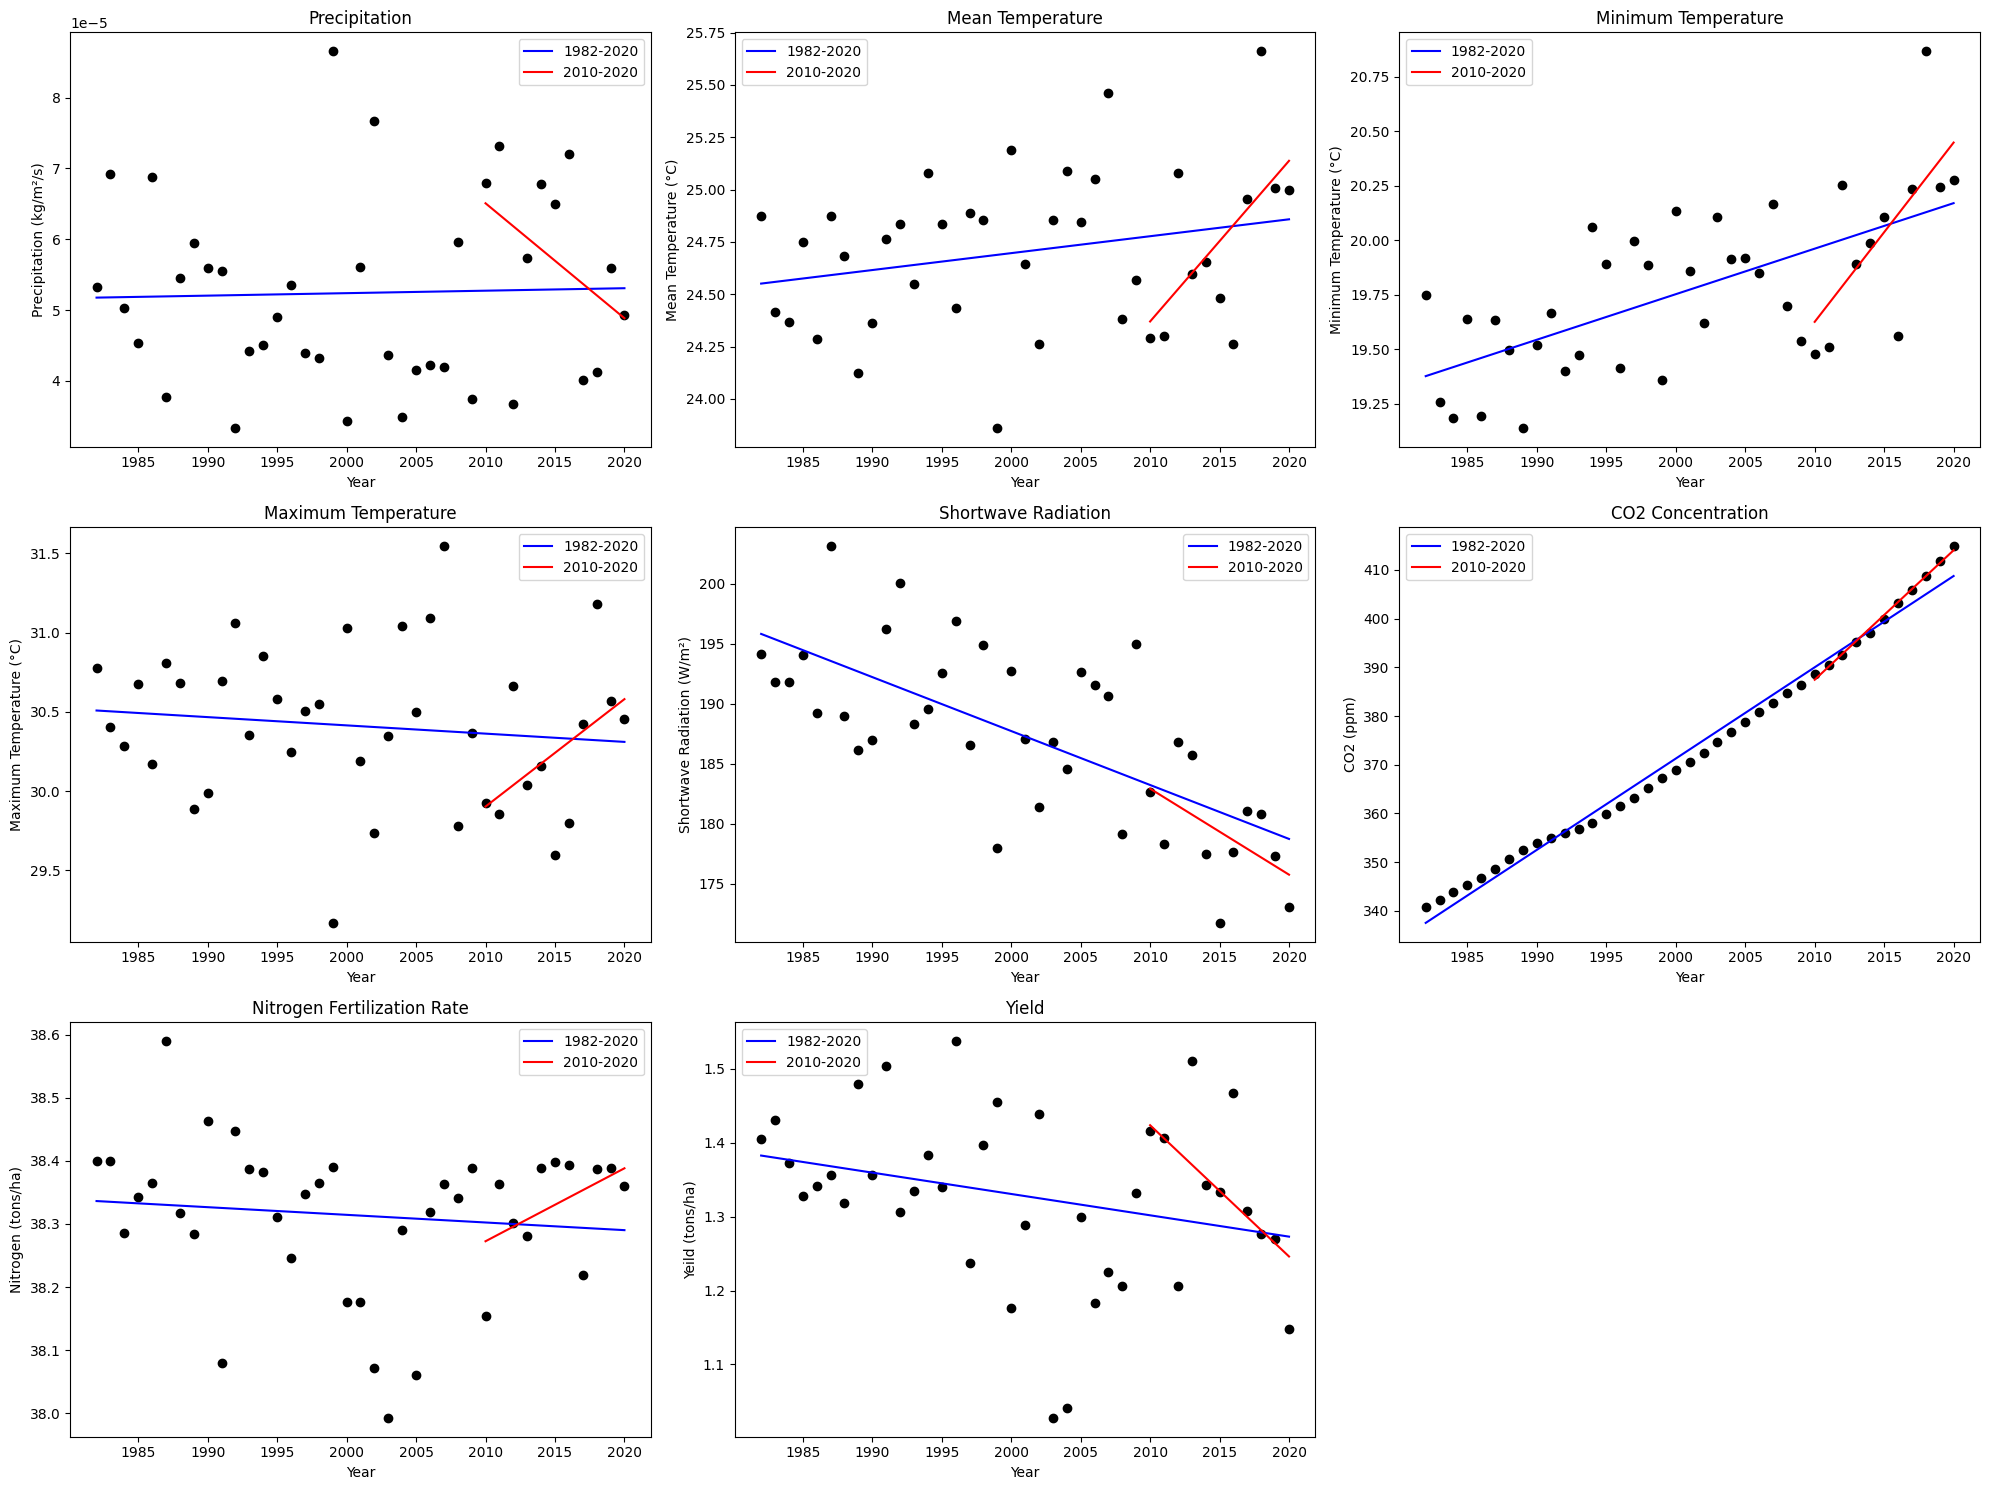

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

country = df[df["Country"] == "India"]
# Group by 'lon' and 'lat' and calculate the mean
average_features = country.groupby(['year','lon', 'lat'])[['tas', 'pr', 'tasmax', 'tasmin', 'texture_class', 'rds', 'nitrogen', 'co2']].mean().reset_index()

# Filter the target variable (yield) for Day 239
target_yield = country[country['Day'] == 239][['year','lon', 'lat', 'yield']]


# Merge the average features with the target yield for Day 239
merged_data = pd.merge(average_features, target_yield, on=['year','lon', 'lat'], how='inner')
print(merged_data.tail(5))

# Ensure numeric columns only
numeric_df = merged_data.select_dtypes(include=[np.number])

# Add the 'year' column back after selecting numeric columns and correcting the mapping to real year
numeric_df['year'] = numeric_df['year']+1601

# Group by year and calculate the mean
grouped_data = numeric_df.groupby('year', as_index=False).mean()

# Define the variables to analyze
variables = ['pr', 'tas', 'tasmin', 'tasmax', 'rds','co2', 'nitrogen', 'yield']
labels=['Precipitation (kg/m²/s)','Mean Temperature (°C)','Minimum Temperature (°C)','Maximum Temperature (°C)', 'Shortwave Radiation (W/m²)','CO2 (ppm)','Nitrogen (tons/ha)','Yeild (tons/ha)']
titles=['Precipitation','Mean Temperature','Minimum Temperature','Maximum Temperature', 'Shortwave Radiation','CO2 Concentration','Nitrogen Fertilization Rate','Yield']
# Plotting the trends
plt.figure(figsize=(20, 15))

for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)

    # Calculate linear regression for the entire period
    slope, intercept, r_value, p_value, std_err = linregress(grouped_data['year'], grouped_data[var])
    plt.plot(grouped_data['year'], slope * grouped_data['year'] + intercept, 'b-', label='1982-2020')

    # Calculate linear regression for the period 2010-2020
    recent_data = grouped_data[grouped_data['year'] >= 2010]
    slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(recent_data['year'], recent_data[var])
    plt.plot(recent_data['year'], slope_recent * recent_data['year'] + intercept_recent, 'r-', label='2010-2020')

    plt.scatter(grouped_data['year'], grouped_data[var], color='black')
    plt.title(titles[i])
    plt.xlabel('Year')
    plt.ylabel(labels[i])
    plt.legend()

plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

# Define variables to analyze (excluding 'yield' as it is the dependent variable)
variables = ['pr', 'tas', 'tasmin', 'tasmax', 'rds', 'co2', 'nitrogen']

# Compute correlation coefficients with yield
correlation_results = grouped_data[variables + ['yield']].corr()['yield'].drop('yield')

# Display results
print("Correlation Coefficients with Yield:\n")
print(correlation_results)


Correlation Coefficients with Yield:

pr          0.551783
tas        -0.577801
tasmin     -0.531803
tasmax     -0.449418
rds         0.133151
co2        -0.268820
nitrogen    0.116065
Name: yield, dtype: float64


In [11]:
import pandas as pd

# Initialize an empty list to store regression results
regression_results = []

for i, var in enumerate(variables):
    if grouped_data[var].notna().sum() > 1:
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(grouped_data[var], grouped_data['yield'])
        
        # Append results to the list
        regression_results.append({
            'Variable': titles[i],
            'Regression Equation': f'Yield = {slope:.4f} * {var} + {intercept:.4f}',
            'Correlation (r)': f'{r_value:.4f}'
        })

# Convert the results into a DataFrame
regression_df = pd.DataFrame(regression_results)

# Display the table
print(regression_df)


                      Variable                  Regression Equation  \
0                Precipitation      Yield = 4922.5584 * pr + 1.0697   
1             Mean Temperature       Yield = -0.1831 * tas + 5.8520   
2          Minimum Temperature    Yield = -0.1690 * tasmin + 4.6692   
3          Maximum Temperature    Yield = -0.1077 * tasmax + 4.6042   
4          Shortwave Radiation        Yield = 0.0021 * rds + 0.9301   
5            CO2 Concentration       Yield = -0.0015 * co2 + 1.8782   
6  Nitrogen Fertilization Rate  Yield = 0.1130 * nitrogen + -3.0029   

  Correlation (r)  
0          0.5518  
1         -0.5778  
2         -0.5318  
3         -0.4494  
4          0.1332  
5         -0.2688  
6          0.1161  


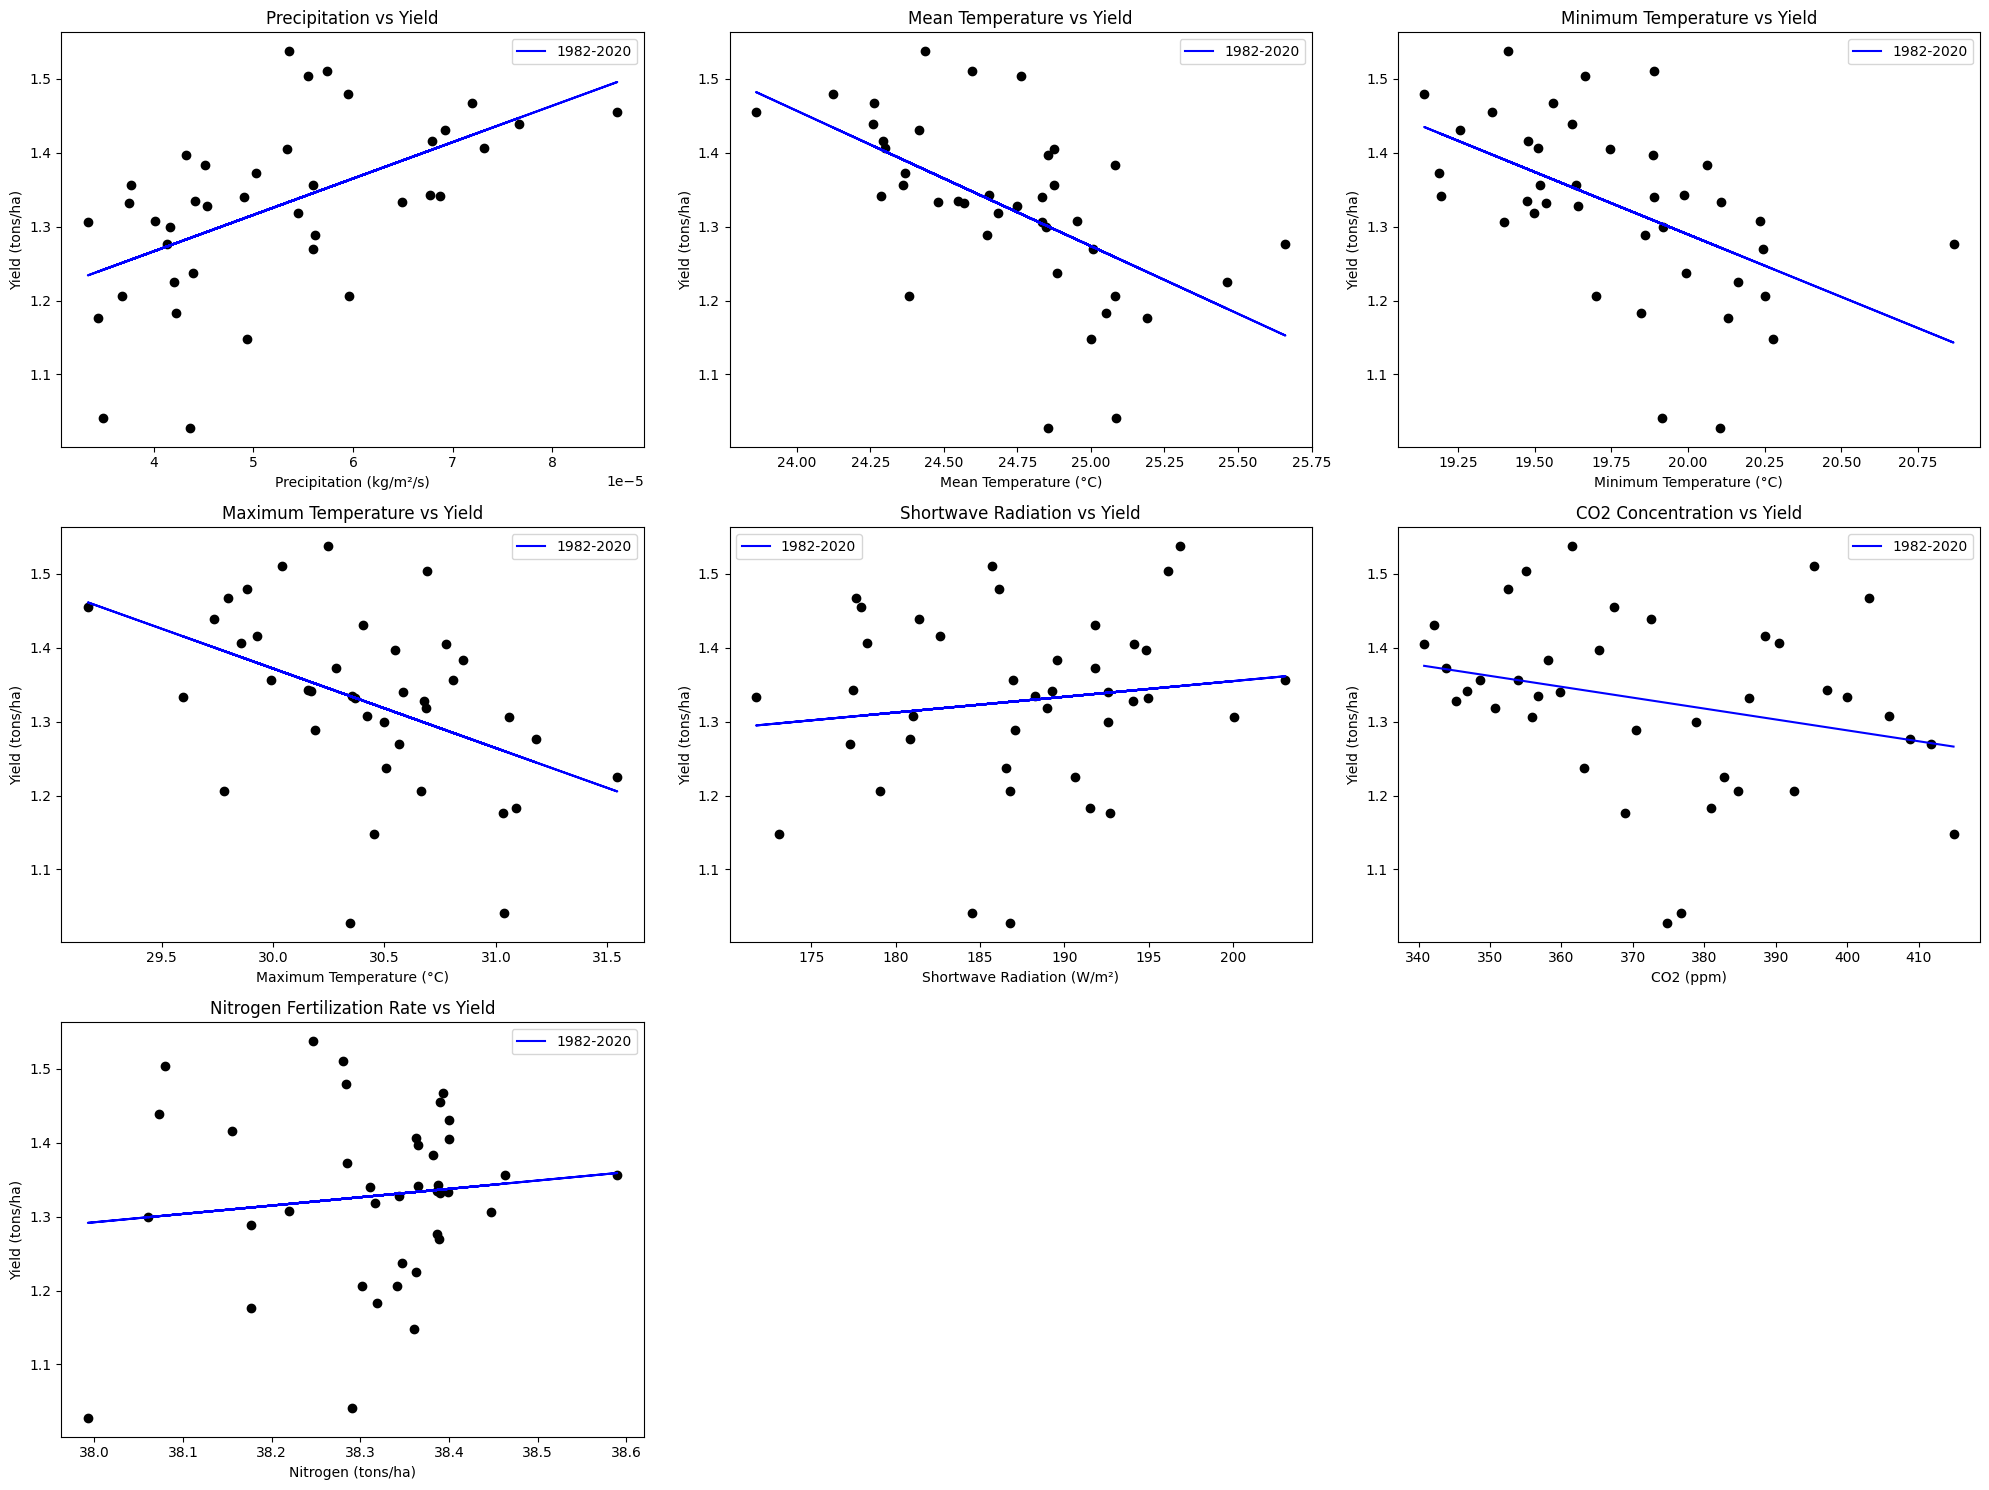

In [27]:
# Define the variables to analyze (excluding 'yield' as it is the y-axis)
variables = ['pr','tas','tasmin', 'tasmax', 'rds', 'co2', 'nitrogen']
labels=['Precipitation (kg/m²/s)','Mean Temperature (°C)','Minimum Temperature (°C)','Maximum Temperature (°C)', 'Shortwave Radiation (W/m²)','CO2 (ppm)','Nitrogen (tons/ha)']
titles=['Precipitation','Mean Temperature','Minimum Temperature','Maximum Temperature', 'Shortwave Radiation','CO2 Concentration','Nitrogen Fertilization Rate']

# Plotting the trends
plt.figure(figsize=(20, 15))

for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)

    # Calculate linear regression for the entire period
    if grouped_data[var].notna().sum() > 1:
        slope, intercept, r_value, p_value, std_err = linregress(grouped_data[var], grouped_data['yield'])
        plt.plot(grouped_data[var], slope * grouped_data[var] + intercept, 'b-', label='1982-2020')

    plt.scatter(grouped_data[var], grouped_data['yield'], color='black')
    plt.title(f'{titles[i]} vs Yield')
    plt.xlabel(labels[i])
    plt.ylabel('Yield (tons/ha)')
    plt.legend()

plt.tight_layout()
plt.show()

In [34]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# Create output directory if it doesn't exist
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Define the variables and their labels
variables = ['pr', 'tas', 'tasmin', 'tasmax', 'rds', 'co2', 'nitrogen']
labels = [
    'Precipitation (kg/m²/s)',
    'Mean Temperature (°C)',
    'Minimum Temperature (°C)',
    'Maximum Temperature (°C)',
    'Shortwave Radiation (W/m²)',
    'CO2 (ppm)',
    'Nitrogen (tons/ha)'
]
titles = [
    'Precipitation',
    'Mean Temperature',
    'Minimum Temperature',
    'Maximum Temperature',
    'Shortwave Radiation',
    'CO2 Concentration',
    'Nitrogen Fertilization Rate'
]

# Plot each variable individually and save as SVG
for i, var in enumerate(variables):
    plt.figure(figsize=(8, 6))

    # Scatter plot
    plt.scatter(grouped_data[var], grouped_data['yield'], color='#F49F17', label='Data Points')

    # Linear regression line
    if grouped_data[var].notna().sum() > 1:
        slope, intercept, r_value, p_value, std_err = linregress(grouped_data[var], grouped_data['yield'])
        regression_line = slope * grouped_data[var] + intercept
        plt.plot(grouped_data[var], regression_line, color='#026C0F', label='Regression Line')

    # Plot details
    plt.title(f'{titles[i]} vs Yield')
    plt.xlabel(labels[i])
    plt.ylabel('Yield (tons/ha)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save plot as SVG
    file_path = os.path.join(output_dir, f"{var}_vs_yield.png")
    plt.savefig(file_path, format='png')

    plt.close()  # Close the figure to save memory


Precipitation: Yield = 4922.5584 * pr + 1.0697
R² = 0.3045 (30.45% variance explained)
Mean Temperature: Yield = -0.1831 * tas + 5.8520
R² = 0.3339 (33.39% variance explained)
Minimum Temperature: Yield = -0.1690 * tasmin + 4.6692
R² = 0.2828 (28.28% variance explained)
Maximum Temperature: Yield = -0.1077 * tasmax + 4.6042
R² = 0.2020 (20.20% variance explained)
Shortwave Radiation: Yield = 0.0021 * rds + 0.9301
R² = 0.0177 (1.77% variance explained)
CO2 Concentration: Yield = -0.0015 * co2 + 1.8782
R² = 0.0723 (7.23% variance explained)
Nitrogen Fertilization Rate: Yield = 0.1130 * nitrogen + -3.0029
R² = 0.0135 (1.35% variance explained)
Error in callback <function _draw_all_if_interactive at 0x000001EDDC65DFC0> (for post_execute):


KeyboardInterrupt: 

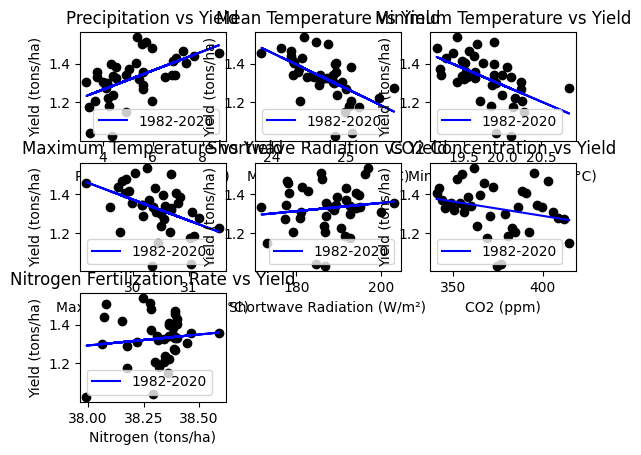

In [19]:
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)

    if grouped_data[var].notna().sum() > 1:
        slope, intercept, r_value, p_value, std_err = linregress(grouped_data[var], grouped_data['yield'])
        plt.plot(grouped_data[var], slope * grouped_data[var] + intercept, 'b-', label='1982-2020')

        # Print the regression equation
        print(f"{titles[i]}: Yield = {slope:.4f} * {var} + {intercept:.4f}")
        print(f"R² = {r_value**2:.4f} ({r_value**2 * 100:.2f}% variance explained)")

    plt.scatter(grouped_data[var], grouped_data['yield'], color='black')
    plt.title(f'{titles[i]} vs Yield')
    plt.xlabel(labels[i])
    plt.ylabel('Yield (tons/ha)')
    plt.legend()


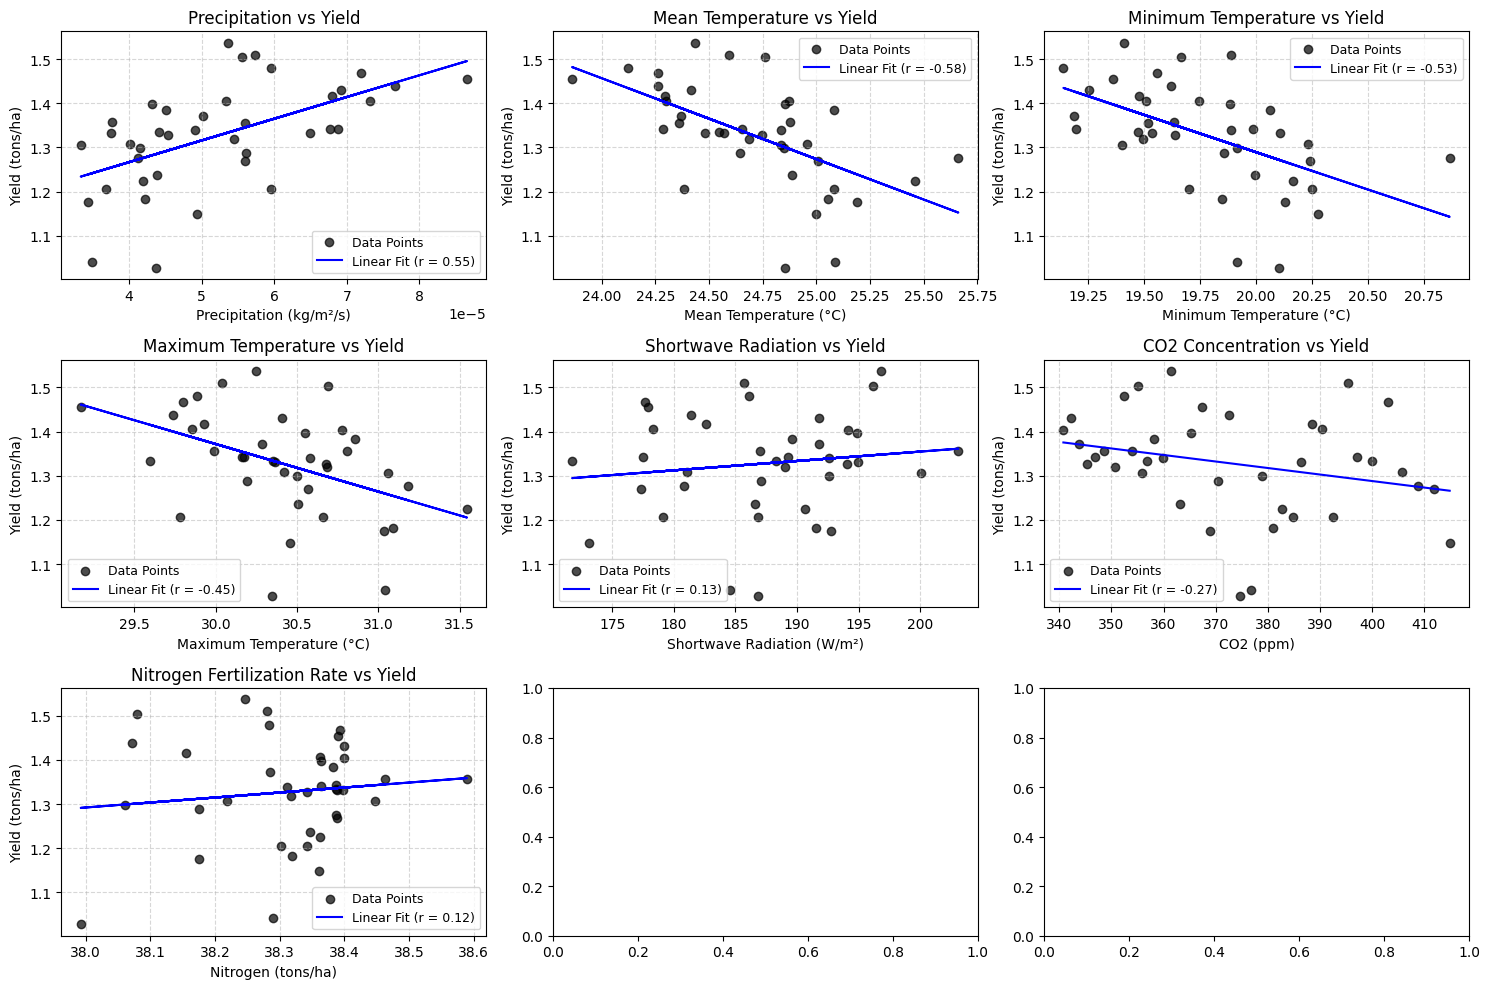

In [ ]:

country = df[df["Country"] == "India"]
# Group by 'lon' and 'lat' and calculate the mean
average_features = country.groupby(['year','lon', 'lat'])[['tas', 'pr', 'tasmax', 'tasmin', 'texture_class', 'rds', 'nitrogen', 'co2']].mean().reset_index()

# Filter the target variable (yield) for Day 239
target_yield = country[country['Day'] == 239][['year','lon', 'lat', 'yield']]


# Merge the average features with the target yield for Day 239
merged_data = pd.merge(average_features, target_yield, on=['year','lon', 'lat'], how='inner')
print(merged_data.tail(5))

# Ensure numeric columns only
numeric_df = merged_data.select_dtypes(include=[np.number])

# Add the 'year' column back after selecting numeric columns and correcting the mapping to real year
numeric_df['year'] = numeric_df['year']+1601

# Group by year and calculate the mean
grouped_data = numeric_df.groupby('year', as_index=False).mean()

# Define variables
variables = ['pr', 'tas', 'tasmin', 'tasmax', 'rds', 'co2', 'nitrogen']
labels = ['Precipitation (kg/m²/s)', 'Mean Temperature (°C)', 'Minimum Temperature (°C)', 
          'Maximum Temperature (°C)', 'Shortwave Radiation (W/m²)', 'CO2 (ppm)', 'Nitrogen (tons/ha)']
titles = ['Precipitation', 'Mean Temperature', 'Minimum Temperature', 
          'Maximum Temperature', 'Shortwave Radiation', 'CO2 Concentration', 'Nitrogen Fertilization Rate']

# Set up figure
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten for easy iteration

# Loop through each variable and plot
for i, var in enumerate(variables):
    ax = axes[i]

    # Scatter plot
    ax.scatter(grouped_data[var], grouped_data['yield'], color='black', alpha=0.7, label="Data Points")

    # Linear regression
    if grouped_data[var].notna().sum() > 1:
        slope, intercept, r_value, _, _ = linregress(grouped_data[var], grouped_data['yield'])
        ax.plot(grouped_data[var], slope * grouped_data[var] + intercept, 'b-', label=f'Linear Fit (r = {r_value:.2f})')

    # Formatting
    ax.set_title(f'{titles[i]} vs Yield', fontsize=12)
    ax.set_xlabel(labels[i], fontsize=10)
    ax.set_ylabel('Yield (tons/ha)', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()
plt.show()


Saved: ./correlation_matrix.csv


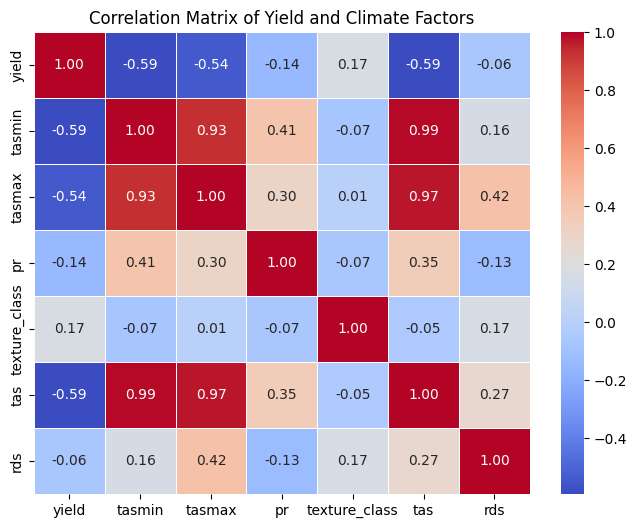

Correlation analysis completed and saved.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# List of relevant environmental factors for correlation
env_factors = ['tasmin', 'tasmax', 'pr', 'texture_class','tas','rds']

# Compute the average environmental values over the first 239 days
df_avg = df[df['Day'] <= 239].groupby(['crop', 'year', 'State', 'Country'])[env_factors].mean().reset_index()

# Extract final yield values at Day 239
df_yield = df[df['Day'] == 239][['crop', 'year', 'State', 'Country', 'yield']]

# Merge the averaged environmental factors with the final yield
df_final = pd.merge(df_avg, df_yield, on=['crop', 'year', 'State', 'Country'])

# Compute and visualize the overall correlation matrix
correlation_matrix = df_final[['yield'] + env_factors].corr()

# Save correlation matrix to CSV
csv_filename = "./correlation_matrix.csv"
correlation_matrix.to_csv(csv_filename, index=True)
print(f"Saved: {csv_filename}")

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Yield and Climate Factors")
plt.show()

print("Correlation analysis completed and saved.")

In [7]:
growth_stages = {
    "sowing": (20, 51),
    "vegetative": (52, 121),
    "reproductive": (122, 191),
    "grain_filling": (192, 239)
}

stage_data = df[(df["Day"] >= 20) & (df["Country"] == "India")].groupby(["year", "lon", "lat", "Day"])["pr"].sum().reset_index()


print(stage_data.head(5))
# Initialize dataframe for storing summed rainfall per stage
stage_sums = stage_data.groupby(["year", "lon", "lat"]).sum().reset_index()[["year", "lon", "lat"]]

for stage, (start, end) in growth_stages.items():
    stage_sums[stage + "_pr"] = stage_data[
        (stage_data["Day"] >= start) & (stage_data["Day"] <= end)
    ].groupby(["year", "lon", "lat"])["pr"].sum().reset_index(drop=True)

# Extract yield for harvest day (Day 239)
yield_data = df[df["Day"] == 239][["year", "lon", "lat", "yield"]]

# Merge rainfall data with yield
merged_df = stage_sums.merge(yield_data, on=["year", "lon", "lat"])

# Compute correlation with yield
correlation_by_stage = merged_df.corr()["yield"].sort_values(ascending=False)

print(correlation_by_stage)


   year    lon    lat  Day   pr
0   381  71.25  23.75   20  0.0
1   381  71.25  23.75   21  0.0
2   381  71.25  23.75   22  0.0
3   381  71.25  23.75   23  0.0
4   381  71.25  23.75   24  0.0
yield               1.000000
reproductive_pr     0.233212
grain_filling_pr    0.042553
lon                -0.008514
vegetative_pr      -0.016831
year               -0.039549
sowing_pr          -0.089755
lat                -0.232835
Name: yield, dtype: float64


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countrywise_yield(df, save_as_svg=True):
    """Plot the total maize yield by country for Day 239 with properly placed labels."""
    try:
        # Filter dataset for only Day 239
        df_filtered = df[df['Day'] == 239]

        # Compute total yield per country
        country_yield = df_filtered.groupby('Country')['Predicted_Yield'].sum().reset_index()
        country_yield = country_yield.sort_values(by='Predicted_Yield', ascending=False)

        # Create bar chart
        plt.figure(figsize=(16, 10))
        ax = sns.barplot(x='Predicted_Yield', y='Country', hue='Country', dodge=False, 
                        data=country_yield, palette='coolwarm', legend=False)

        # Add edge colors for clarity
        for bar in ax.patches:
            bar.set_edgecolor('gray')
            bar.set_linewidth(0.5)

        # Enhance aesthetics
        ax.set_title('Total Maize Predicted_Yield by Country (Day 239)', fontsize=20, weight='bold')
        ax.set_xlabel('Total Predicted_Yield (Tons/Ha)', fontsize=14)
        ax.set_ylabel('Country', fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12)

        # Consistent black text with adaptive placement
        max_width = max(country_yield['yield'])
        for bar in ax.patches:
            value = bar.get_width()
            text_x = value - (0.05 * max_width) if value > 0.7 * max_width else value + (0.01 * max_width)  

            ax.annotate(f'{value:,.2f}', 
                        (text_x, bar.get_y() + bar.get_height() / 2),
                        ha='right' if value > 0.7 * max_width else 'left',
                        va='center', fontsize=12, color='black', weight='bold')

        # Optimize layout
        plt.tight_layout()

        # Save as SVG
        if save_as_svg:
            plt.savefig("countrywise_yield.svg", format="svg", bbox_inches="tight")
            print("Plot saved as 'countrywise_yield.svg'")

        plt.show()

    except Exception as e:
        print(f"Error in country-wise yield plot: {str(e)}")

# Example Usage:
plot_countrywise_yield(df)


Error in country-wise yield plot: 'Country'


In [18]:
df_filtered = df[df['Day'] == 239]
print(df_filtered.head())

      year    lon    lat  Day   pr       rds       tas     tasmin    tasmax  \
239    420  72.75  22.25  239  0.0  201.3732  20.28436   9.515198  29.22165   
479    420  72.75  22.75  239  0.0  199.8163  19.78088   8.971008  29.03439   
719    420  72.75  23.25  239  0.0  202.1969  18.74451   7.240448  27.38324   
959    420  72.75  23.75  239  0.0  201.5864  18.05219   6.781860  26.73624   
1199   420  73.25  17.25  239  0.0  231.6426  25.74060  20.356960  31.66223   

      nitrogen     co2  texture_class      yield  Predicted_Yield   crop  \
239     38.938  418.06              9  20.296440         0.306203  maize   
479     38.938  418.06              9  13.612790         1.151139  maize   
719     38.938  418.06              9   0.571534         0.966544  maize   
959     38.938  418.06              9  11.419630         4.452828  maize   
1199    38.938  418.06              9  13.264910         2.900227  maize   

            State Country  
239       Gujarat   India  
479       Gu

         Country     yield
6  United States  8.086716
0      Argentina  5.800595
5        Ukraine  3.908573
4   South Africa  3.157795
1         Brazil  2.984059
3         Mexico  1.815341
2          India  1.332625
Plot saved as 'countrywise_yield.svg'


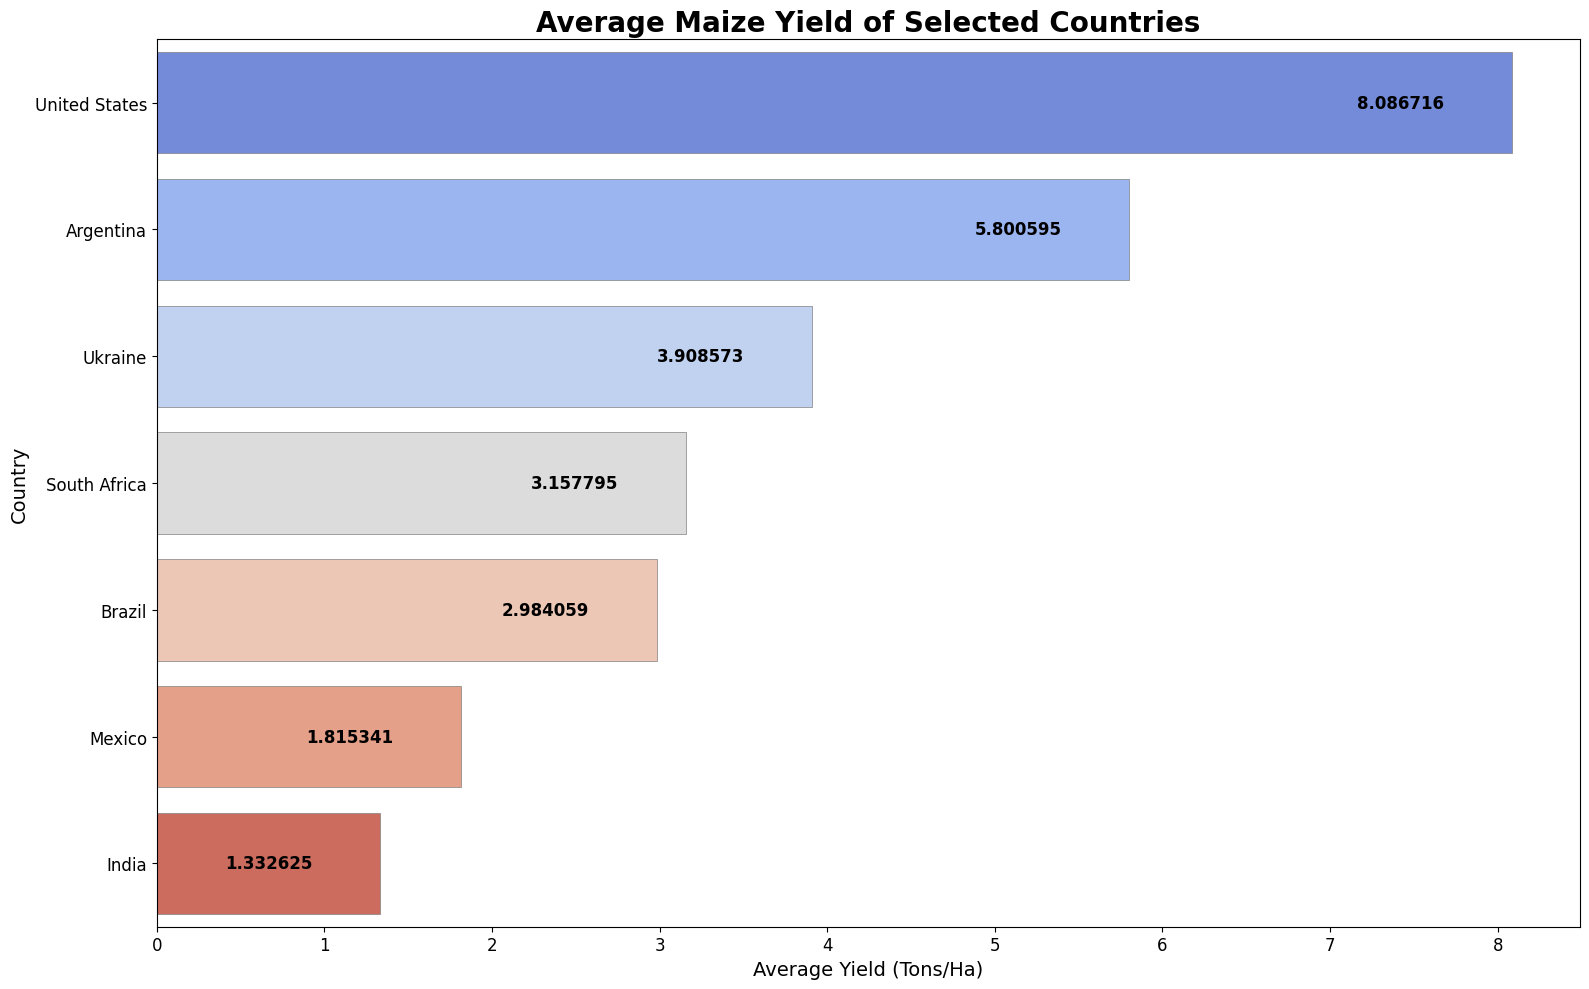

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countrywise_yield(df, save_as_svg=True):
    """Plot the total maize yield by country for Day 239 and save as SVG."""
    try:
        # Filter dataset for only Day 239
        df_filtered = df[(df['Day'] == 239)]

        # Compute total yield per country
        country_yield = df_filtered.groupby('Country')['yield'].mean().reset_index()
        country_yield = country_yield.sort_values(by='yield', ascending=False)
        print(country_yield)

        # Create a visually appealing bar chart
        plt.figure(figsize=(16, 10))
        ax = sns.barplot(x='yield', y='Country', hue='Country', dodge=False, 
                        data=country_yield.head(7), palette='coolwarm', legend=False)

        # Add edge colors to bars for a polished look
        for bar in ax.patches:
            bar.set_edgecolor('gray')
            bar.set_linewidth(0.5)

        # Enhance aesthetics
        ax.set_title('Average Maize Yield of Selected Countries', fontsize=20, weight='bold')
        ax.set_xlabel('Average Yield (Tons/Ha)', fontsize=14)
        ax.set_ylabel('Country', fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12)

        # Add labels inside bars
        for bar in ax.patches:
            value = bar.get_width()
            text_x = value - (0.05 * max(country_yield['yield']))  
            ax.annotate(f'{value:.6f}', 
                        (text_x, bar.get_y() + bar.get_height() / 2),
                        ha='right', va='center', fontsize=12, color='black', weight='bold')

        # Optimize layout
        plt.tight_layout()

        # Save as SVG
        if save_as_svg:
            plt.savefig("countrywise_yield.svg", format="svg", bbox_inches="tight")
            print("Plot saved as 'countrywise_yield.svg'")

        plt.show()

    except Exception as e:
        print(f"Error in country-wise yield plot: {str(e)}")

# Example Usage:
plot_countrywise_yield(df)


         Country  Predicted_Yield
6  United States         6.601844
0      Argentina         5.962810
5        Ukraine         3.097911
1         Brazil         2.894242
4   South Africa         2.622586
3         Mexico         1.655109
2          India         1.049296
Plot saved as 'countrywise_Predicted_Yield.svg'


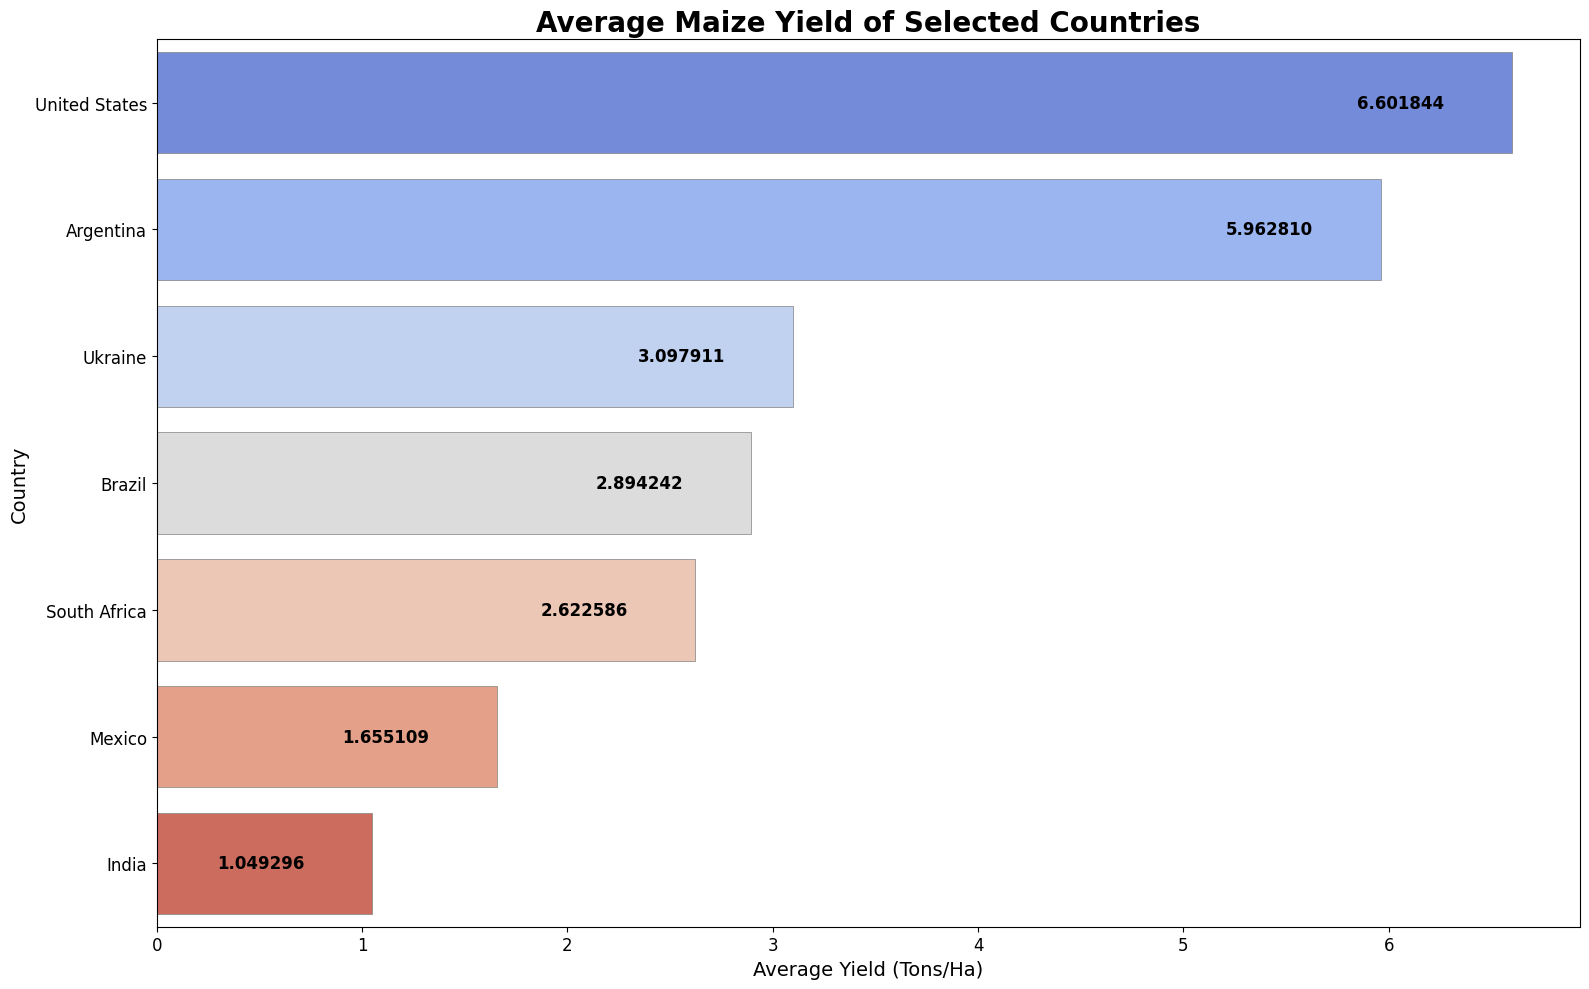

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countrywise_Predicted_Yield(df, save_as_svg=True):
    """Plot the total maize Predicted_Yield by country for Day 239 and save as SVG."""
    try:
        # Filter dataset for only Day 239
        df_filtered = df[(df['Day'] == 239)]

        # Compute total Predicted_Yield per country
        country_Predicted_Yield = df_filtered.groupby('Country')['Predicted_Yield'].mean().reset_index()
        country_Predicted_Yield['Country'] = country_Predicted_Yield['Country'].str.replace(' predicted', '', regex=False)

        country_Predicted_Yield = country_Predicted_Yield.sort_values(by='Predicted_Yield', ascending=False)
        print(country_Predicted_Yield)

        # Create a visually appealing bar chart
        plt.figure(figsize=(16, 10))
        ax = sns.barplot(x='Predicted_Yield', y='Country', hue='Country', dodge=False, 
                        data=country_Predicted_Yield.head(7), palette='coolwarm', legend=False)

        # Add edge colors to bars for a polished look
        for bar in ax.patches:
            bar.set_edgecolor('gray')
            bar.set_linewidth(0.5)

        # Enhance aesthetics
        ax.set_title('Average Maize Yield of Selected Countries', fontsize=20, weight='bold')
        ax.set_xlabel('Average Yield (Tons/Ha)', fontsize=14)
        ax.set_ylabel('Country', fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12)

        # Add labels inside bars
        for bar in ax.patches:
            value = bar.get_width()
            text_x = value - (0.05 * max(country_Predicted_Yield['Predicted_Yield']))  
            ax.annotate(f'{value:.6f}', 
                        (text_x, bar.get_y() + bar.get_height() / 2),
                        ha='right', va='center', fontsize=12, color='black', weight='bold')

        # Optimize layout
        plt.tight_layout()

        # Save as SVG
        if save_as_svg:
            plt.savefig("countrywise_Predicted_Yield.svg", format="svg", bbox_inches="tight")
            print("Plot saved as 'countrywise_Predicted_Yield.svg'")

        plt.show()

    except Exception as e:
        print(f"Error in country-wise Predicted_Yield plot: {str(e)}")

# Example Usage:
plot_countrywise_Predicted_Yield(df)


In [4]:
import pandas as pd

def export_yield_csv(df, filename="country_predicted_yield.csv"):
    # Filter for Day 239 and India
    df_filtered = df[(df['Day'] == 239)]

    # Compute mean yield per state
    country_yield = df_filtered.groupby('Country')['Predicted_Yield'].mean().reset_index()

    # Sort and select top 7 states
    top7 = country_yield.sort_values(by='Predicted_Yield', ascending=False).head(7)

    # Rename column for clarity in Canva
    top7.columns = ['Country', 'Yield (Tons/Ha)']

    # Save to CSV
    top7.to_csv(filename, index=False)
    print(f"CSV saved as '{filename}'")

# Example usage:
export_yield_csv(df)


CSV saved as 'country_predicted_yield.csv'


                State     yield
22         Tamil Nadu  2.758656
0      Andhra Pradesh  2.480108
23          Telangana  2.396610
15            Manipur  2.377447
26        West Bengal  2.362072
2               Assam  2.253623
19             Punjab  1.786137
9   Jammu and Kashmir  1.732974
11          Karnataka  1.680031
4          Chandigarh  1.503967
12             Kerala  1.493260
8    Himachal Pradesh  1.448868
3               Bihar  1.417594
14        Maharashtra  1.404344
17           Nagaland  1.399637
7             Haryana  1.285645
16          Meghalaya  1.189105
1   Arunachal Pradesh  1.145417
5        Chhattisgarh  1.114324
20          Rajasthan  1.085319
10          Jharkhand  1.007148
21             Sikkim  0.996519
18             Odisha  0.994738
24      Uttar Pradesh  0.904154
6             Gujarat  0.903207
13     Madhya Pradesh  0.872417
25        Uttarakhand  0.752829
Plot saved as 'countrywise_yield.svg'


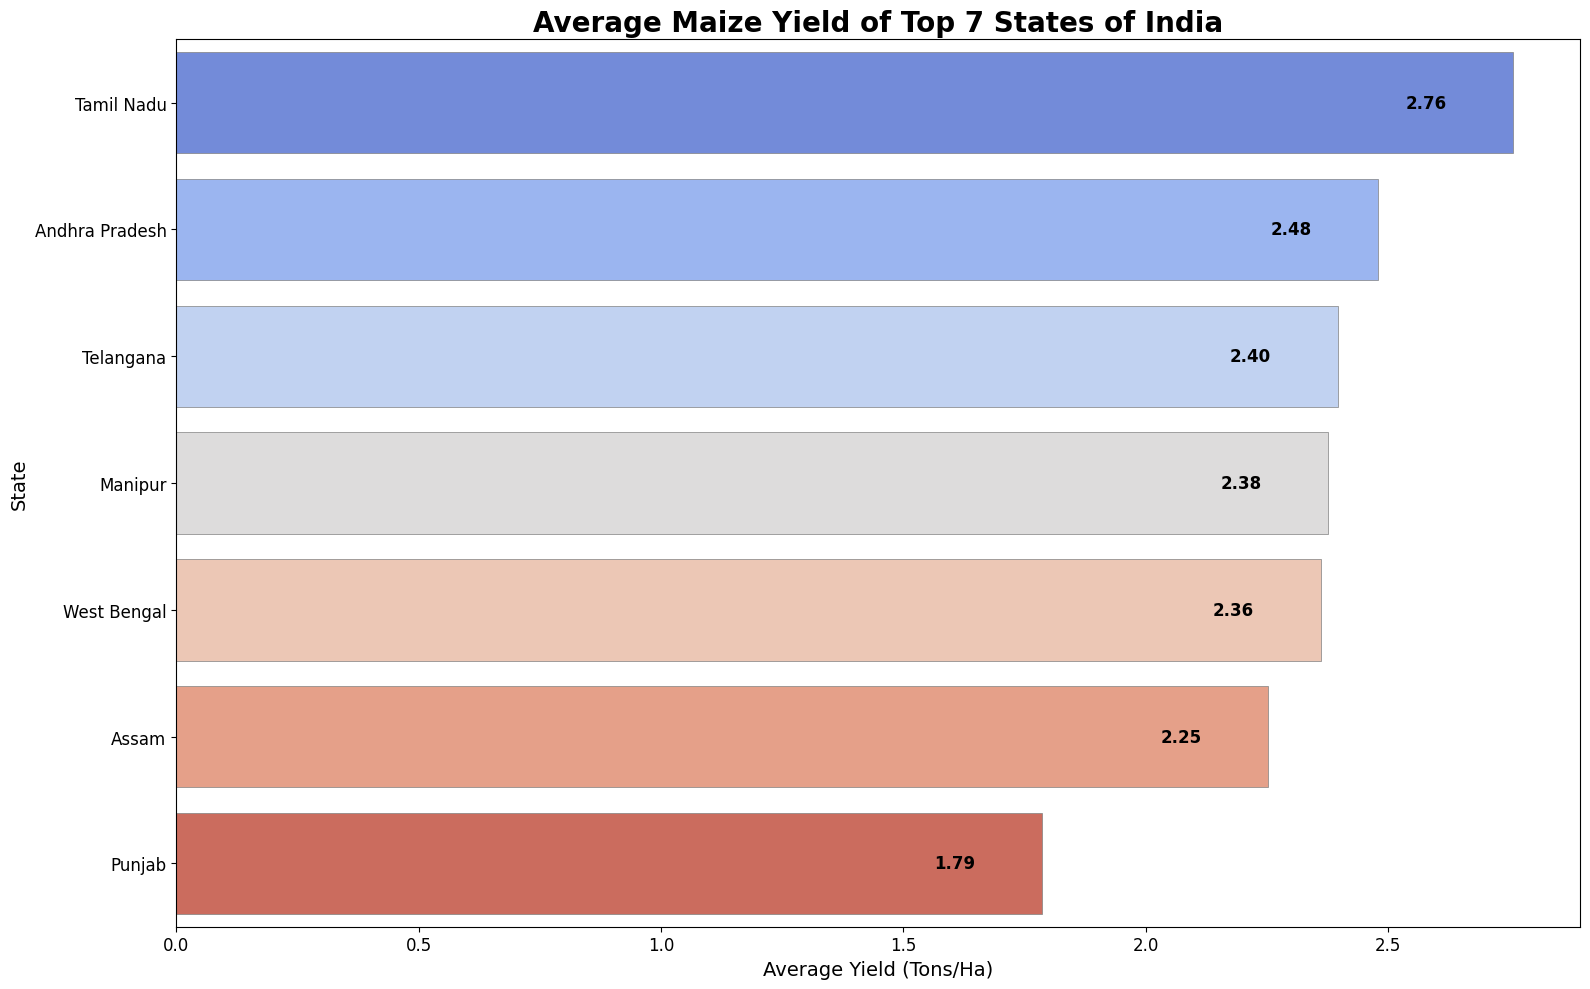

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countrywise_yield(df, save_as_svg=True):
    """Plot the total maize yield by country for Day 239 and save as SVG."""
    try:
        # Filter dataset for only Day 239
        df_filtered = df[(df['Day'] == 239) & (df['Country'] == 'India')]

        # Compute total yield per country
        country_yield = df_filtered.groupby('State')['yield'].mean().reset_index()
        country_yield = country_yield.sort_values(by='yield', ascending=False)
        print(country_yield)
        # Save to CSV
        country_yield.to_csv("statewise_yield.csv", index=False)

        # Create a visually appealing bar chart
        plt.figure(figsize=(16, 10))
        ax = sns.barplot(x='yield', y='State', hue='State', dodge=False, 
                        data=country_yield.head(7), palette='coolwarm', legend=False)

        # Add edge colors to bars for a polished look
        for bar in ax.patches:
            bar.set_edgecolor('gray')
            bar.set_linewidth(0.5)

        # Enhance aesthetics
        ax.set_title('Average Maize Yield of Top 7 States of India', fontsize=20, weight='bold')
        ax.set_xlabel('Average Yield (Tons/Ha)', fontsize=14)
        ax.set_ylabel('State', fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12)

        # Add labels inside bars
        for bar in ax.patches:
            value = bar.get_width()
            text_x = value - (0.05 * max(country_yield['yield']))  
            ax.annotate(f'{value:.2f}', 
                        (text_x, bar.get_y() + bar.get_height() / 2),
                        ha='right', va='center', fontsize=12, color='black', weight='bold')

        # Optimize layout
        plt.tight_layout()

        # Save as SVG
        if save_as_svg:
            plt.savefig("countrywise_yield.svg", format="svg", bbox_inches="tight")
            print("Plot saved as 'countrywise_yield.svg'")

        plt.show()

    except Exception as e:
        print(f"Error in country-wise yield plot: {str(e)}")

# Example Usage:
plot_countrywise_yield(df)


In [6]:
import pandas as pd

def export_yield_csv(df, filename="country_yield.csv"):
    df_filtered = df[(df['Day'] == 239) & (df['Country'] == 'India predicted')]

    # Compute mean yield per state
    country_yield = df_filtered.groupby('State')['Predicted_Yield'].mean().reset_index()

    # Sort and select top 7 states
    top7 = country_yield.sort_values(by='Predicted_Yield', ascending=False).head(7)

    # Rename column for clarity in Canva
    top7.columns = ['State', 'Yield (Tons/Ha)']

    # Save to CSV
    top7.to_csv(filename, index=False)
    print(f"CSV saved as '{filename}'")

# Example usage:
export_yield_csv(df)


CSV saved as 'country_yield.csv'


                State  Predicted_Yield
1   Arunachal Pradesh         1.193390
5        Chhattisgarh         1.156570
6             Gujarat         1.117136
17           Nagaland         1.117051
3               Bihar         1.108274
25        Uttarakhand         1.105898
9   Jammu and Kashmir         1.101885
10          Jharkhand         1.100652
19             Punjab         1.087973
16          Meghalaya         1.081529
14        Maharashtra         1.067522
24      Uttar Pradesh         1.050545
15            Manipur         1.047978
20          Rajasthan         1.042708
13     Madhya Pradesh         1.037805
21             Sikkim         1.033694
2               Assam         1.031184
18             Odisha         1.030444
12             Kerala         1.028170
8    Himachal Pradesh         1.005289
4          Chandigarh         1.001538
23          Telangana         0.994673
26        West Bengal         0.991634
11          Karnataka         0.989617
0      Andhra Pradesh    

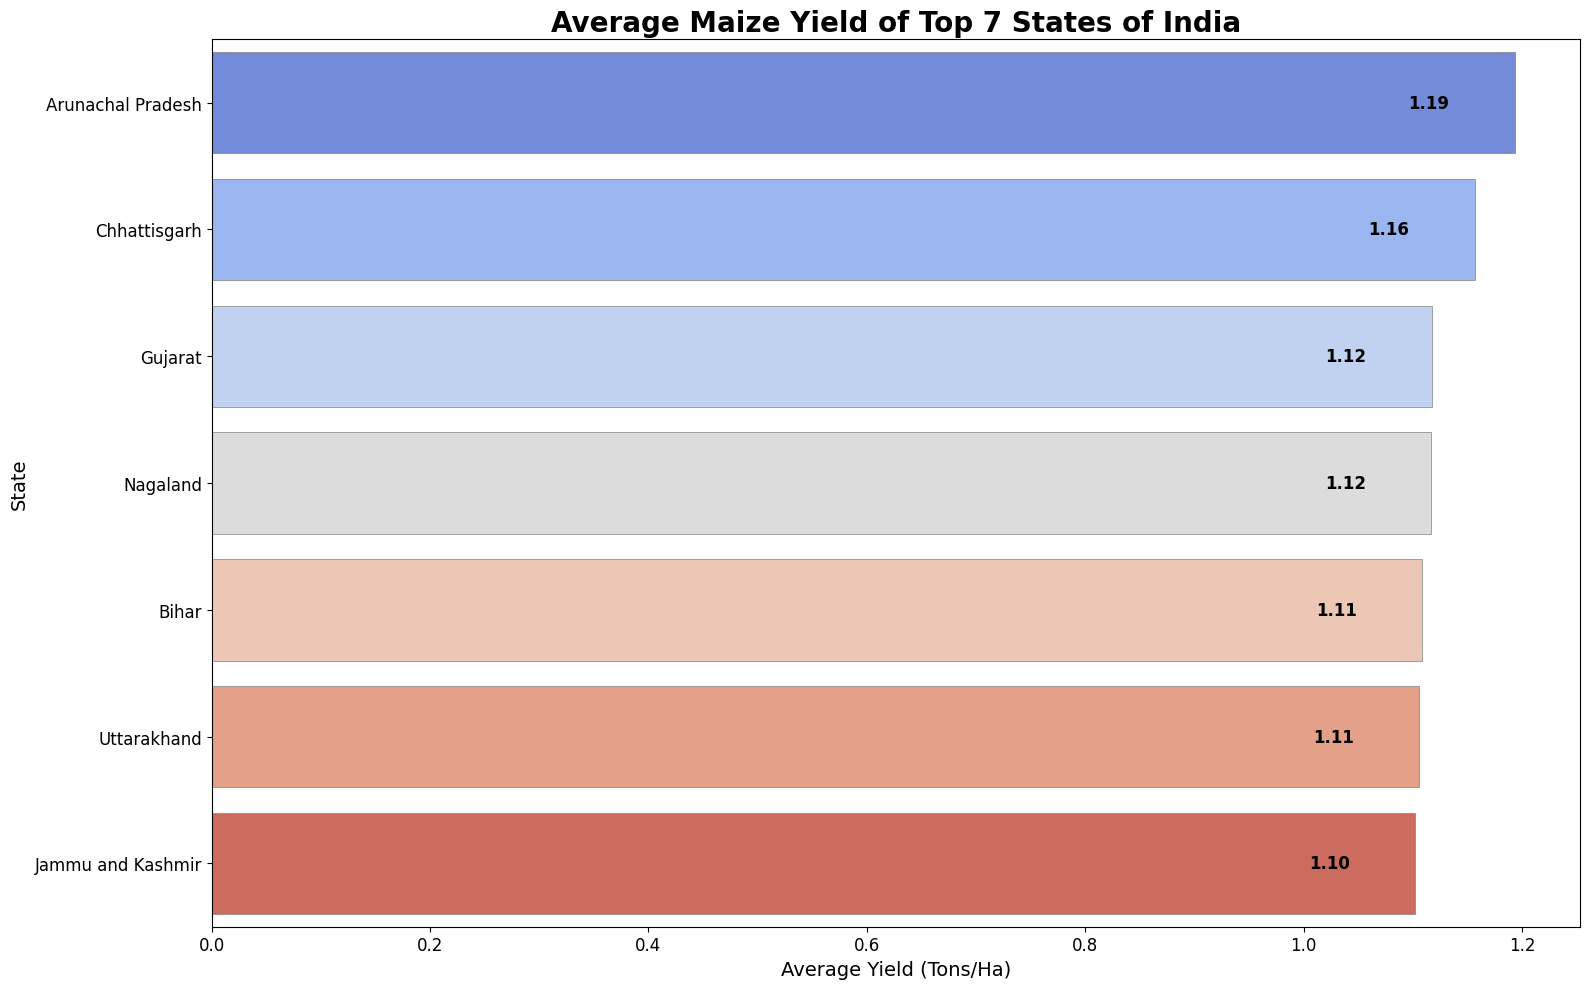

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countrywise_Predicted_Yield(df, save_as_svg=True):
    """Plot the total maize Predicted_Yield by country for Day 239 and save as SVG."""
    try:
        # Filter dataset for only Day 239
        df_filtered = df[(df['Day'] == 239) & (df['Country'] == 'India predicted')]

        country_Predicted_Yield = df_filtered.groupby('State')['Predicted_Yield'].mean().reset_index()
        country_Predicted_Yield = country_Predicted_Yield.sort_values(by='Predicted_Yield', ascending=False)
        print(country_Predicted_Yield)
        # Save to CSV
        country_Predicted_Yield.to_csv("statewise_Predicted_Yield.csv", index=False)

        # Create a visually appealing bar chart
        plt.figure(figsize=(16, 10))
        ax = sns.barplot(x='Predicted_Yield', y='State', hue='State', dodge=False, 
                        data=country_Predicted_Yield.head(7), palette='coolwarm', legend=False)

        # Add edge colors to bars for a polished look
        for bar in ax.patches:
            bar.set_edgecolor('gray')
            bar.set_linewidth(0.5)

        # Enhance aesthetics
        ax.set_title('Average Maize Yield of Top 7 States of India', fontsize=20, weight='bold')
        ax.set_xlabel('Average Yield (Tons/Ha)', fontsize=14)
        ax.set_ylabel('State', fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12)

        # Add labels inside bars
        for bar in ax.patches:
            value = bar.get_width()
            text_x = value - (0.05 * max(country_Predicted_Yield['Predicted_Yield']))  
            ax.annotate(f'{value:.2f}', 
                        (text_x, bar.get_y() + bar.get_height() / 2),
                        ha='right', va='center', fontsize=12, color='black', weight='bold')

        # Optimize layout
        plt.tight_layout()

        # Save as SVG
        if save_as_svg:
            plt.savefig("countrywise_Predicted_Yield.svg", format="svg", bbox_inches="tight")
            print("Plot saved as 'countrywise_Predicted_Yield.svg'")

        plt.show()

    except Exception as e:
        print(f"Error in country-wise Predicted_Yield plot: {str(e)}")

plot_countrywise_Predicted_Yield(df)


In [24]:
import os

def save_countrywise_yield_csvs(df, output_folder="country_yield_csvs"):
    """Generate a CSV file of average yield per state for each country on Day 239."""

    try:
        # Create folder to store CSVs
        os.makedirs(output_folder, exist_ok=True)

        # Filter dataset for Day 239
        df_filtered = df[df['Day'] == 239]

        # Get all unique countries
        countries = df_filtered['Country'].unique()

        for country in countries:
            # Filter for the specific country
            country_df = df_filtered[df_filtered['Country'] == country]

            # Group by state and calculate mean yield
            country_yield = country_df.groupby('State')['yield'].mean().reset_index()
            country_yield = country_yield.sort_values(by='yield', ascending=False)

            # File name format: e.g. India_yield.csv
            filename = f"{output_folder}/{country}_yield.csv"
            country_yield.to_csv(filename, index=False)
            print(f"✅ Saved: {filename}")

    except Exception as e:
        print(f"❌ Error: {str(e)}")

save_countrywise_yield_csvs(df)


✅ Saved: country_yield_csvs/Argentina_yield.csv
✅ Saved: country_yield_csvs/Brazil_yield.csv
✅ Saved: country_yield_csvs/India_yield.csv
✅ Saved: country_yield_csvs/Mexico_yield.csv
✅ Saved: country_yield_csvs/South Africa_yield.csv
✅ Saved: country_yield_csvs/Ukraine_yield.csv
✅ Saved: country_yield_csvs/United States_yield.csv


           Country  year     yield
0        Argentina  1982  8.040356
156   South Africa  1982  3.491773
195        Ukraine  1982  4.018142
78           India  1982  1.404696
234  United States  1982  8.650415
           Country  year     yield
155         Mexico  2020  1.699153
38       Argentina  2020  4.645775
233        Ukraine  2020  3.426189
77          Brazil  2020  2.817838
272  United States  2020  7.189937
Plot saved as 'countrywise_yield_trends.svg'


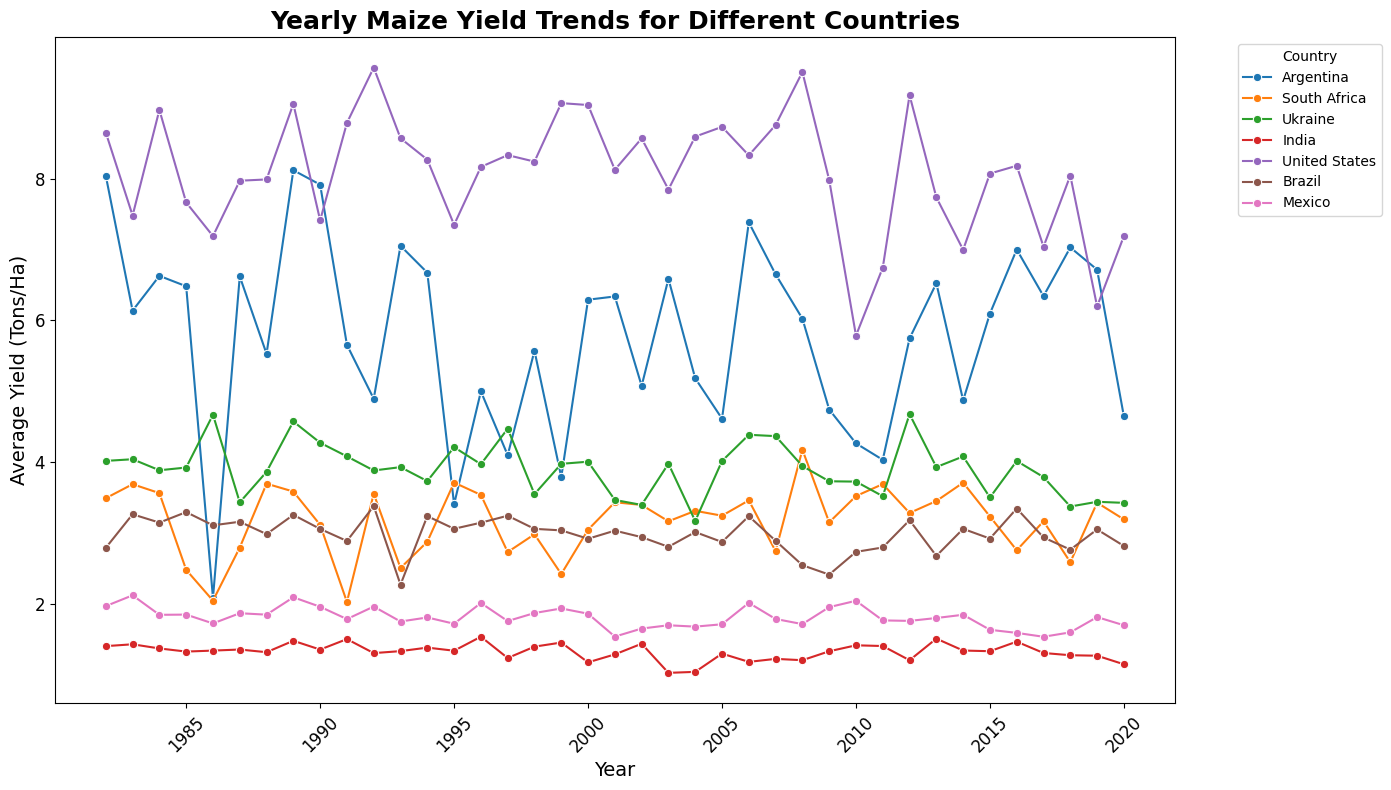

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countrywise_yield_trends(df, save_as_svg=True):
    """Plot maize yield trends over years for different countries on Day 239 and save as SVG."""
    try:
        # Ensure correct data filtering (Day 239, excluding India)
        df_filtered = df[(df['Day'] == 239)]
        

        # Compute yearly total yield per country
        country_trends = df_filtered.groupby(['Country', 'year'])['yield'].mean().reset_index()

        # Sort by year and adjust year
        country_trends = country_trends.sort_values(by='year')
        country_trends['year'] += 1601  # Adjust year format

        print(country_trends.head())  # Debugging output
        print(country_trends.tail())

        # Create a line plot
        plt.figure(figsize=(14, 8))
        ax = sns.lineplot(x='year', y='yield', hue='Country', data=country_trends, marker='o', palette='tab10')

        # Enhance aesthetics
        ax.set_title('Yearly Maize Yield Trends for Different Countries', fontsize=18, weight='bold')
        ax.set_xlabel('Year', fontsize=14)
        ax.set_ylabel('Average Yield (Tons/Ha)', fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12, rotation=45)

        # Add legend outside the plot
        plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

        # Optimize layout
        plt.tight_layout()

        # Save as SVG
        if save_as_svg:
            plt.savefig("countrywise_yield_trends.svg", format="svg", bbox_inches="tight")
            print("Plot saved as 'countrywise_yield_trends.svg'")

        plt.show()

    except Exception as e:
        print(f"Error in country-wise yield trend plot: {str(e)}")

# Example Usage:
plot_countrywise_yield_trends(df)


In [19]:
import pandas as pd

def export_canva_ready_data(df, output_file="canva_countrywise_yield.csv"):
    try:
        # Step 1: Filter to only Day 239
        df_filtered = df[df["Day"] == 239]

        # Step 2: Compute average yield per country per year
        grouped = df_filtered.groupby(['year', 'Country'])['yield'].mean().reset_index()

        # Step 3: Adjust year value
        grouped['Year'] = grouped['year'] + 1601
        grouped.drop(columns=['year'], inplace=True)

        # Step 4: Pivot to wide format
        canva_df = grouped.pivot(index='Year', columns='Country', values='yield').reset_index()

        # Step 5: Round for clarity
        canva_df = canva_df.round(4)

        # Step 6: Save to CSV
        canva_df.to_csv(output_file, index=False)
        print(f"✅ Canva-friendly CSV saved as '{output_file}'")
    except Exception as e:
        print(f"❌ Error creating Canva CSV: {e}")

# Example usage:
export_canva_ready_data(df)


✅ Canva-friendly CSV saved as 'canva_countrywise_yield.csv'


              State  year     yield
0    Andhra Pradesh  1982  2.342000
194     West Bengal  1982  2.417667
155       Telangana  1982  2.653323
78          Manipur  1982  2.928000
39            Assam  1982  3.257167
              State  year     yield
38   Andhra Pradesh  2020  2.001400
115         Manipur  2020  1.652000
77            Assam  2020  2.925667
193       Telangana  2020  1.971593
232     West Bengal  2020  3.605800
Plot saved as 'statewise_yield_trends.svg'


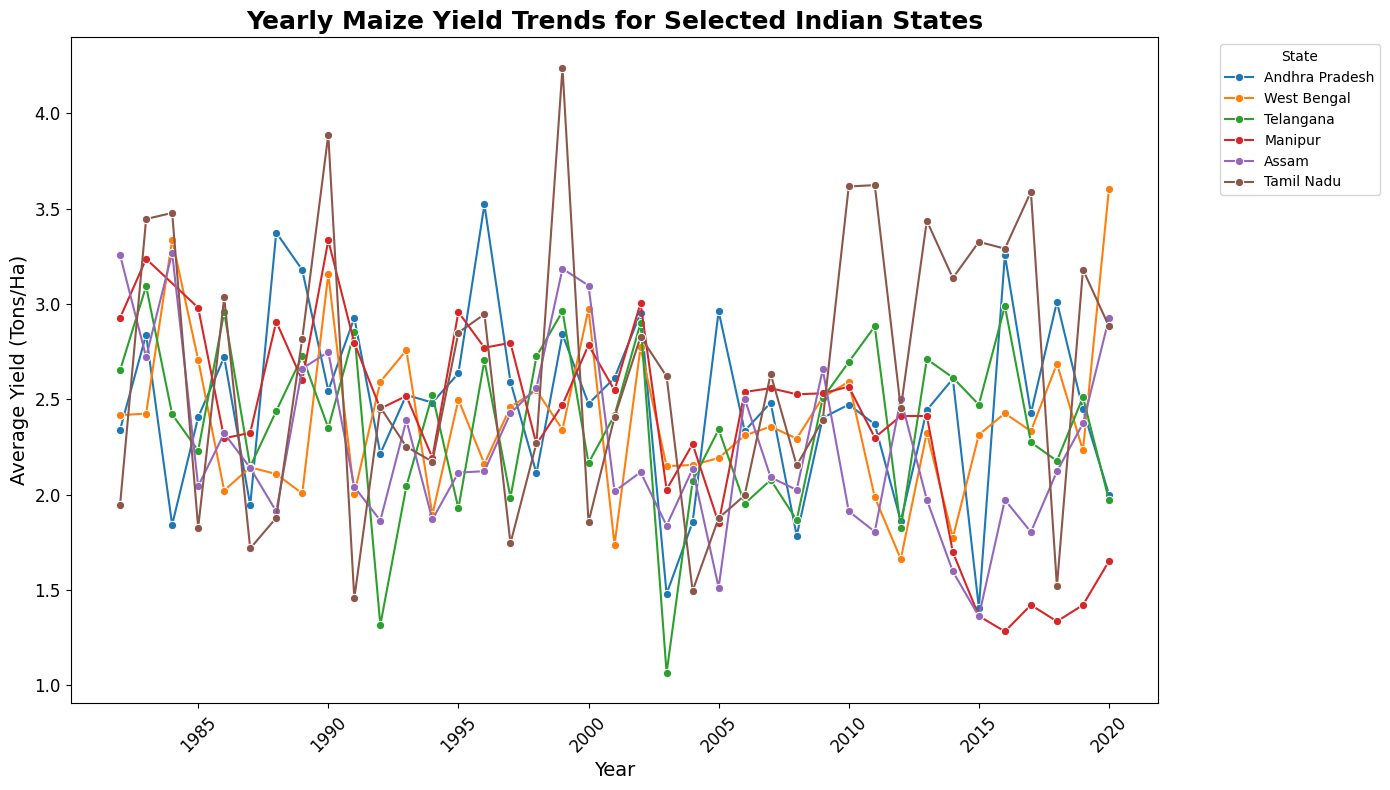

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_statewise_yield_trends(df, states, save_as_svg=True):
    """Plot maize yield trends over years for specified Indian states on Day 239 and save as SVG."""
    try:
        # Ensure correct data filtering (Day 239, India-specific states)
        df_filtered = df[(df['Day'] == 239) & (df['State'].isin(states))]

        # Compute yearly total yield per state
        state_trends = df_filtered.groupby(['State', 'year'])['yield'].mean().reset_index()

        # Sort by year and adjust year
        state_trends = state_trends.sort_values(by='year')
        state_trends['year'] += 1601  # Adjust year format

        print(state_trends.head())  # Debugging output
        print(state_trends.tail())

        # Create a line plot
        plt.figure(figsize=(14, 8))
        ax = sns.lineplot(x='year', y='yield', hue='State', data=state_trends, marker='o', palette='tab10')

        # Enhance aesthetics
        ax.set_title('Yearly Maize Yield Trends for Selected Indian States', fontsize=18, weight='bold')
        ax.set_xlabel('Year', fontsize=14)
        ax.set_ylabel('Average Yield (Tons/Ha)', fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12, rotation=45)

        # Add legend outside the plot
        plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')

        # Optimize layout
        plt.tight_layout()

        # Save as SVG
        if save_as_svg:
            plt.savefig("statewise_yield_trends.svg", format="svg", bbox_inches="tight")
            print("Plot saved as 'statewise_yield_trends.svg'")

        plt.show()

    except Exception as e:
        print(f"Error in state-wise yield trend plot: {str(e)}")

selected_states = [
    'Tamil Nadu', 'Andhra Pradesh', 'Telangana',
    'Manipur', 'West Bengal', 'Assam'
]

# Example Usage:
plot_statewise_yield_trends(df, selected_states)

              State  year  Predicted_Yield
0    Andhra Pradesh  2021         1.358754
129     West Bengal  2021         1.124181
103       Telangana  2021         0.885993
52          Manipur  2021         0.928335
26            Assam  2021         0.965390
              State  year  Predicted_Yield
76          Manipur  2046         1.419472
25   Andhra Pradesh  2046         1.239137
128       Telangana  2046         1.054644
51            Assam  2046         1.074254
154     West Bengal  2046         0.718948
Plot saved as 'statewise_Predicted_Yield_trends.svg'


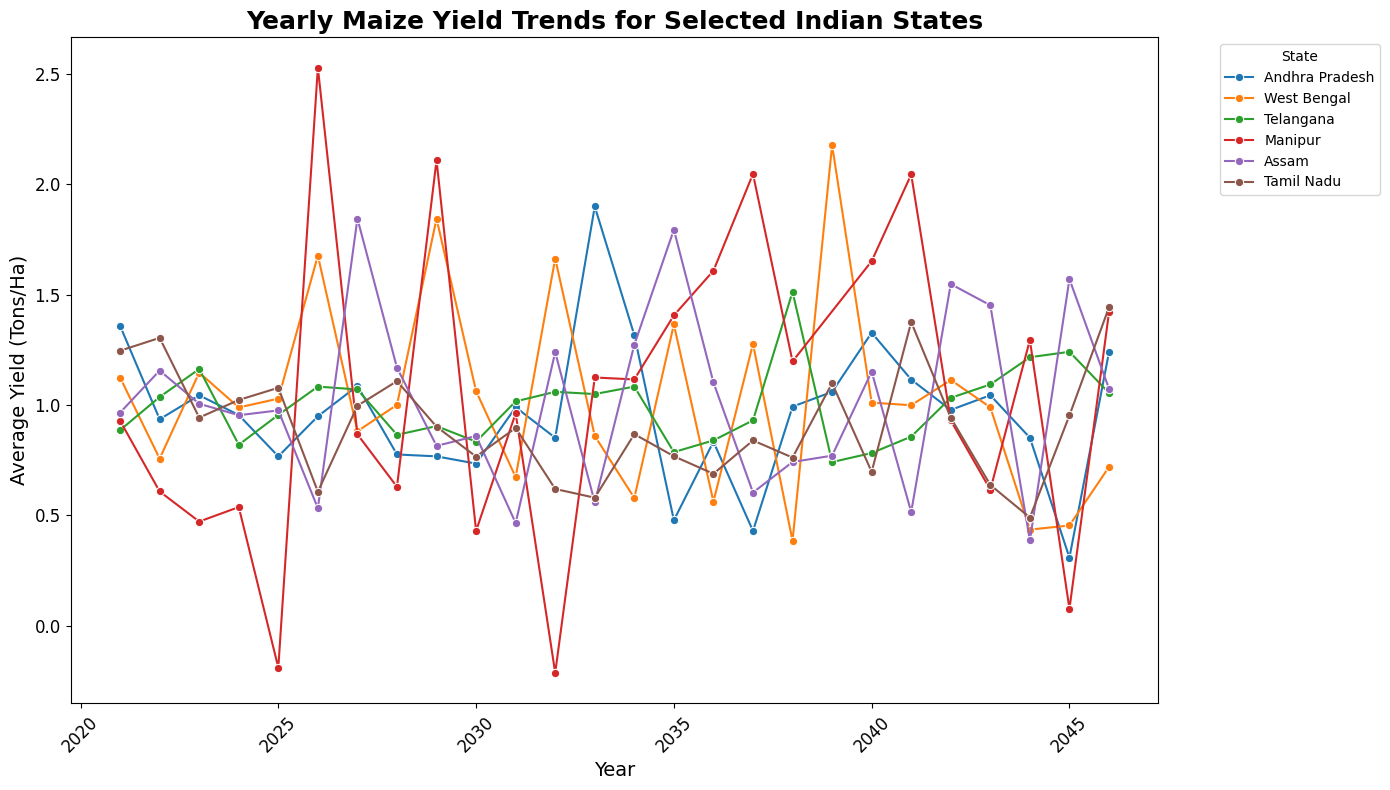

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_statewise_Predicted_Yield_trends(df, states, save_as_svg=True):
    """Plot maize Predicted_Yield trends over years for specified Indian states on Day 239 and save as SVG."""
    try:
        # Ensure correct data filtering (Day 239, India-specific states)
        df_filtered = df[(df['Day'] == 239) & (df['State'].isin(states))]

        # Compute yearly total Predicted_Yield per state
        state_trends = df_filtered.groupby(['State', 'year'])['Predicted_Yield'].mean().reset_index()

        # Sort by year and adjust year
        state_trends = state_trends.sort_values(by='year')
        state_trends['year'] += 1601  # Adjust year format

        print(state_trends.head())  # Debugging output
        print(state_trends.tail())

        # Create a line plot
        plt.figure(figsize=(14, 8))
        ax = sns.lineplot(x='year', y='Predicted_Yield', hue='State', data=state_trends, marker='o', palette='tab10')

        # Enhance aesthetics
        ax.set_title('Yearly Maize Yield Trends for Selected Indian States', fontsize=18, weight='bold')
        ax.set_xlabel('Year', fontsize=14)
        ax.set_ylabel('Average Yield (Tons/Ha)', fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
        ax.tick_params(axis='x', labelsize=12, rotation=45)

        # Add legend outside the plot
        plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')

        # Optimize layout
        plt.tight_layout()

        # Save as SVG
        if save_as_svg:
            plt.savefig("statewise_Predicted_Yield_trends.svg", format="svg", bbox_inches="tight")
            print("Plot saved as 'statewise_Predicted_Yield_trends.svg'")

        plt.show()

    except Exception as e:
        print(f"Error in state-wise Predicted_Yield trend plot: {str(e)}")

selected_states = [
    'Tamil Nadu', 'Andhra Pradesh', 'Telangana',
    'Manipur', 'West Bengal', 'Assam'
]

# Example Usage:
plot_statewise_Predicted_Yield_trends(df, selected_states)

In [5]:
import pandas as pd

def export_canva_ready_data(df, output_file="canva_statewise_yield.csv"):
    try:
        # Step 1: Filter to only Day 239
        df_filtered = df[(df['Day'] == 239) & (df['State'].isin(selected_states))]

        # Step 2: Compute average yield per country per year
        grouped = df_filtered.groupby(['year', 'State'])['yield'].mean().reset_index()

        # Step 3: Adjust year value
        grouped['Year'] = grouped['year'] + 1601
        grouped.drop(columns=['year'], inplace=True)

        # Step 4: Pivot to wide format
        canva_df = grouped.pivot(index='Year', columns='State', values='yield').reset_index()

        # Step 5: Round for clarity
        canva_df = canva_df.round(4)

        # Step 6: Save to CSV
        canva_df.to_csv(output_file, index=False)
        print(f"✅ Canva-friendly CSV saved as '{output_file}'")
    except Exception as e:
        print(f"❌ Error creating Canva CSV: {e}")

# Example usage:
export_canva_ready_data(df)

selected_states = [
    'Tamil Nadu', 'Andhra Pradesh', 'Telangana',
    'Manipur', 'West Bengal', 'Assam'
]


✅ Canva-friendly CSV saved as 'canva_statewise_yield.csv'


In [ ]:
import pandas as pd

def export_canva_ready_data(df, output_file="canva_countrywise_yield.csv"):
    try:
        # Step 1: Filter to only Day 239
        df_filtered = df[df["Day"] == 239]

        # Step 2: Compute average yield per country per year
        grouped = df_filtered.groupby(['year', 'State'])['yield'].mean().reset_index()

        # Step 3: Adjust year value
        grouped['Year'] = grouped['year'] + 1601
        grouped.drop(columns=['year'], inplace=True)

        # Step 4: Pivot to wide format
        canva_df = grouped.pivot(index='Year', columns='State', values='yield').reset_index()

        # Step 5: Round for clarity
        canva_df = canva_df.round(4)

        # Step 6: Save to CSV
        canva_df.to_csv(output_file, index=False)
        print(f"✅ Canva-friendly CSV saved as '{output_file}'")
    except Exception as e:
        print(f"❌ Error creating Canva CSV: {e}")

# Example usage:
export_canva_ready_data(df)


In [8]:
import pandas as pd

def export_canva_ready_data(df, output_file="canva_statewise_Predicted_Yield.csv"):
    try:
        # Step 1: Filter to only Day 239
        df_filtered = df[(df['Day'] == 239) & (df['State'].isin(selected_states))]

        # Step 2: Compute average Predicted_Yield per country per year
        grouped = df_filtered.groupby(['year', 'State'])['Predicted_Yield'].mean().reset_index()

        # Step 3: Adjust year value
        grouped['Year'] = grouped['year'] + 1601
        grouped.drop(columns=['year'], inplace=True)

        # Step 4: Pivot to wide format
        canva_df = grouped.pivot(index='Year', columns='State', values='Predicted_Yield').reset_index()

        # Step 5: Round for clarity
        canva_df = canva_df.round(4)

        # Step 6: Save to CSV
        canva_df.to_csv(output_file, index=False)
        print(f"✅ Canva-friendly CSV saved as '{output_file}'")
    except Exception as e:
        print(f"❌ Error creating Canva CSV: {e}")

# Example usage:
export_canva_ready_data(df)

selected_states = [
    'Tamil Nadu', 'Andhra Pradesh', 'Telangana',
    'Manipur', 'West Bengal', 'Assam'
]


✅ Canva-friendly CSV saved as 'canva_statewise_Predicted_Yield.csv'
